<a href="https://colab.research.google.com/github/shi5a/Data-Science-Bootcamp/blob/main/ML_week3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA Assignment - ML Section**


Shaikha AlBilais

# **Assignment Specifications**

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

# **Libraries Importing**

In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

sns.set_palette("husl", 8)

# **Data Loading**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")

# **EDA**

In [3]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
368,3,81,86,16,66,27.5,0.306,22,0


## **Data Exploration**

In [4]:
df.shape

(768, 9)

In [5]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.Outcome.unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

## **Data Visualazation**

Text(0.5, 1.0, 'Pair Plot of the Dataest')

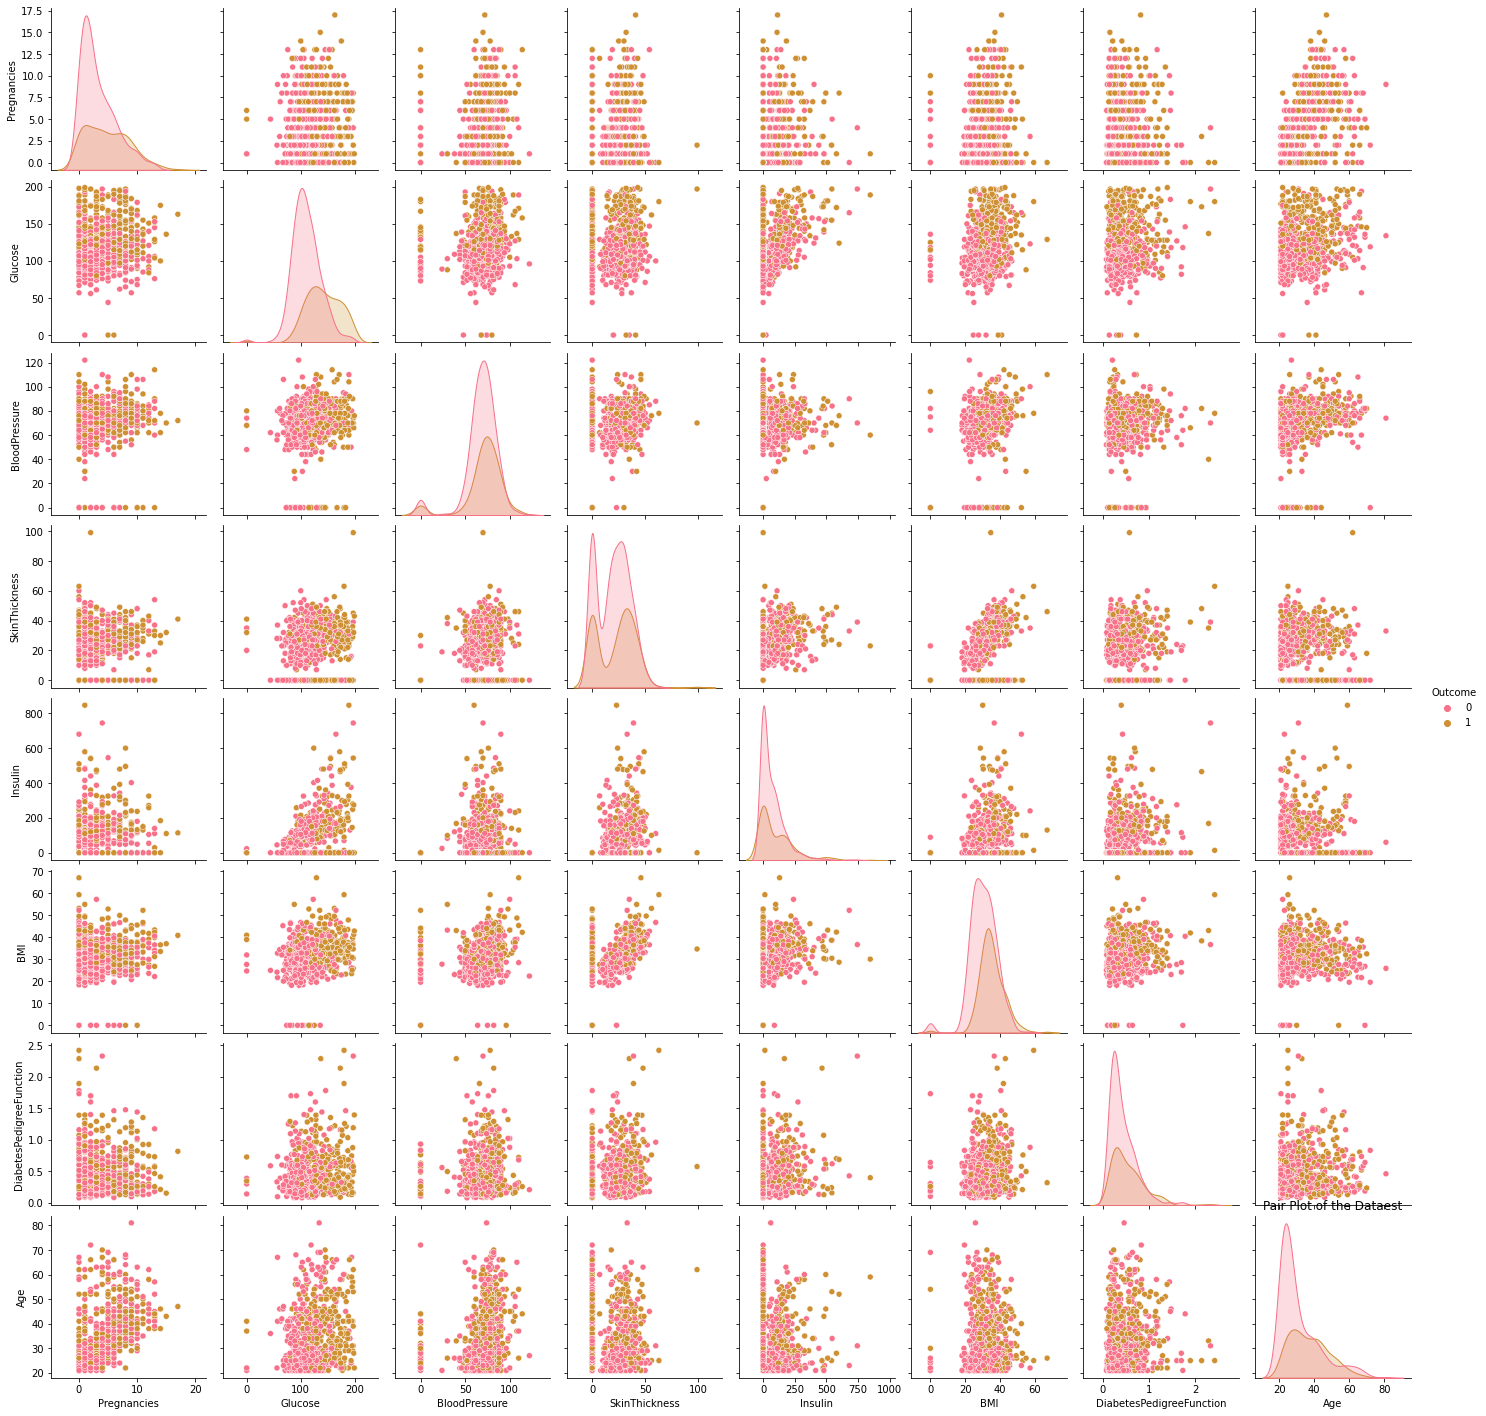

In [9]:
sns.pairplot(df, hue='Outcome')
plt.title("Pair Plot of the Dataest")

Text(0.5, 1.0, 'Rel Plot - Insulin & SkinThickness')

<Figure size 720x360 with 0 Axes>

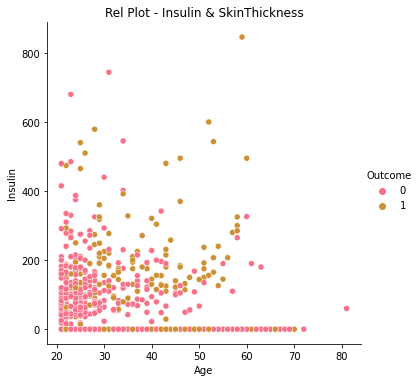

In [10]:
plt.figure(figsize=(10,5))
sns.relplot(y='Insulin', x='Age', hue='Outcome', data=df)
plt.title("Rel Plot - Insulin & SkinThickness")

Text(0.5, 1.0, 'Scatter Plot - SkinThickness & Insulin')

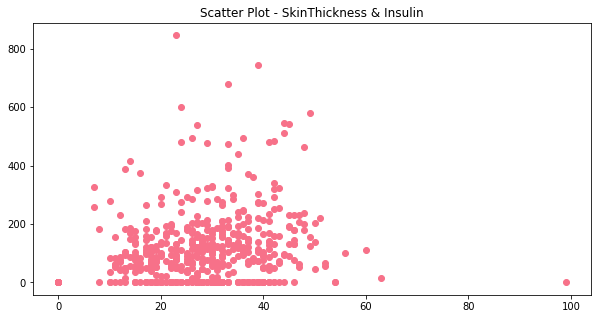

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(data= df, x='SkinThickness', y='Insulin')
plt.title("Scatter Plot - SkinThickness & Insulin")

Text(0.5, 1.0, 'Pregnancies Count')

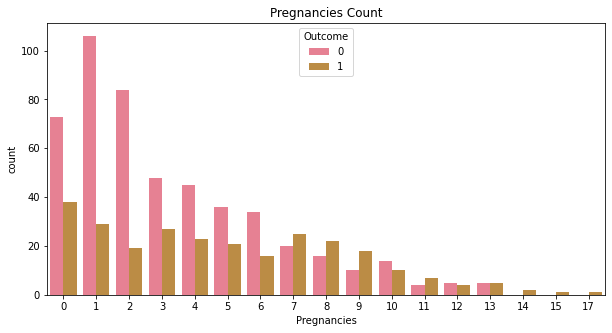

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df.Pregnancies, hue='Outcome')
plt.title("Pregnancies Count")

Text(0.5, 1.0, 'Precentage of Poeple Having Diabtes or Not')

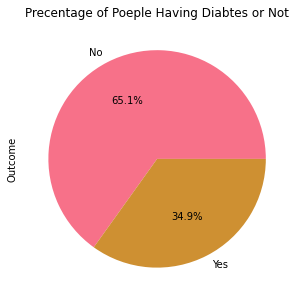

In [13]:
plt.figure(figsize=(10,5))
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%',labels=('No','Yes'))
plt.title("Precentage of Poeple Having Diabtes or Not")

# **Data Preperation**

## **Data Cleaning**

Checking for Null Values

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for Outliers

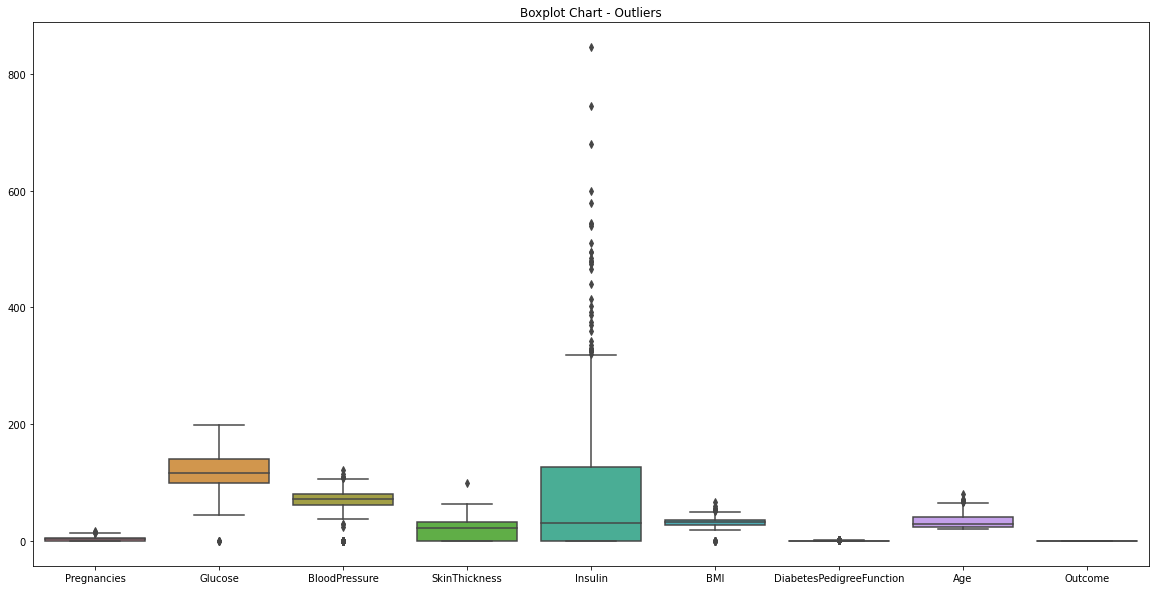

In [15]:
fig=plt.figure(figsize=(20,10))
plt.title('Boxplot Chart - Outliers')
sns.boxplot(data=df);

So far, there is no thing needs to be cleaned

## **Data Splitting**

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
X = df.drop(['Outcome'], axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

## **Data Scaling**

In [18]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

In [19]:
X_test = ss.fit_transform(X_test)

# **Data Modeling**

## **Baseline Model**

In [20]:
def baseline_model(n_predictions, value_to_predict):
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)
baseline_value = y_train.value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

0      0
1      0
2      0
3      0
4      0
      ..
149    0
150    0
151    0
152    0
153    0
Length: 154, dtype: int64

In [21]:
bl_acc = accuracy_score(y_test, baseline_preds)
print("Baseline Accuracy = {:.2f}%".format(bl_acc*100))

Baseline Accuracy = 62.99%


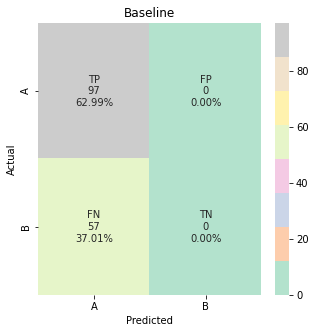

In [22]:
cf = confusion_matrix(y_test, baseline_preds)

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

## **Logistic Regression Model**

In [23]:
lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr_preds = lr.predict(X_test)

In [25]:
lr_acc = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy = {:.2f}%".format(lr_acc*100))

Logistic Regression Accuracy = 78.57%


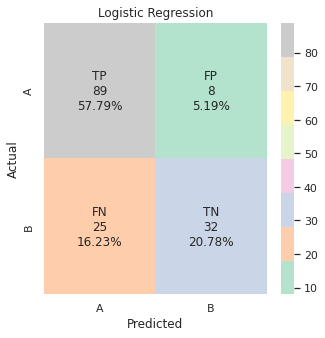

In [26]:
cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

## **Baseline Vs. Logistic Regression**

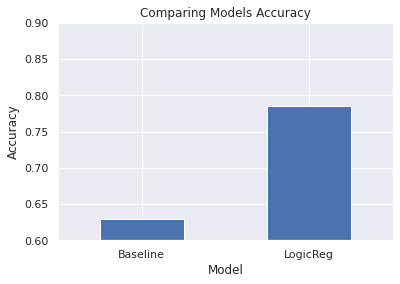

In [27]:
pd.DataFrame([bl_acc, lr_acc]).plot.bar()
plt.xticks(np.arange(2),('Baseline','LogicReg'))
plt.legend().remove()
plt.ylim(0.6, 0.9)
plt.annotate = True
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Models Accuracy');

Basline: ROC AUC=0.500
Logistic: ROC AUC=0.739


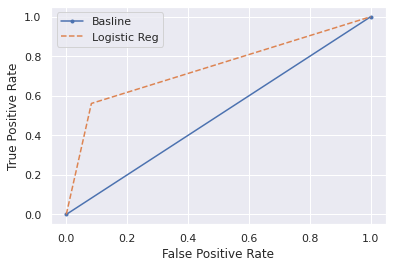

In [28]:
# calculate scores
bl_auc = roc_auc_score(y_test, baseline_preds)
lr_auc = roc_auc_score(y_test, lr_preds)

# summarize scores
print('Basline: ROC AUC=%.3f' % (bl_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
bl_fpr, bl_tpr, _ = roc_curve(y_test, baseline_preds)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)

# plot the roc curve for the model
pyplot.plot(bl_fpr, bl_tpr, marker='.', label='Basline')
pyplot.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Reg')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

# **Data Optimization and Validation**

## **Grid Search CV**

In [29]:
param_grid ={'solver': ['liblinear'],'fit_intercept':[True, False]}
grid = GridSearchCV(lr, param_grid,cv=10 )

grid_fit = grid.fit(X_train, y_train)

In [30]:
grid_fit.best_params_

{'fit_intercept': True, 'solver': 'liblinear'}

In [31]:
grid_fit.best_score_

0.7767847699629825

## **Principal Component Analysis (PCA)**

In [32]:
pca = PCA()
x_train_pca= pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

pca.explained_variance_ratio_

array([0.2597798 , 0.21722124, 0.12166712, 0.1120307 , 0.09929738,
       0.08550729, 0.05474518, 0.04975129])

Using the components for Logistic Regression Model

In [33]:
lr2 = LogisticRegression()

lr2.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
preds = lr2.predict(x_test_pca)

In [35]:
pca_acc = accuracy_score(y_test, preds)
print("Logistic Regression Accuracy with PCA = {:.2f}%".format(pca_acc*100))

Logistic Regression Accuracy with PCA = 78.57%


# **Bonus**

Creating a Scree Plot

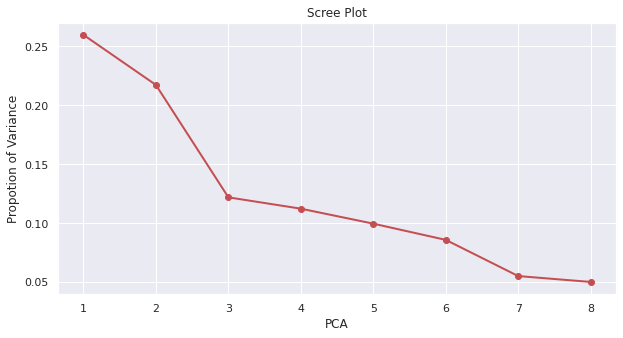

In [36]:
plt.figure(figsize=(10,5))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('PCA')
plt.ylabel('Propotion of Variance')
plt.show()